[ 2.31169274e-05 -1.11834759e-05  6.50811693e-02 -3.48218348e-02
  2.96672575e-05]
0.032262688949515186


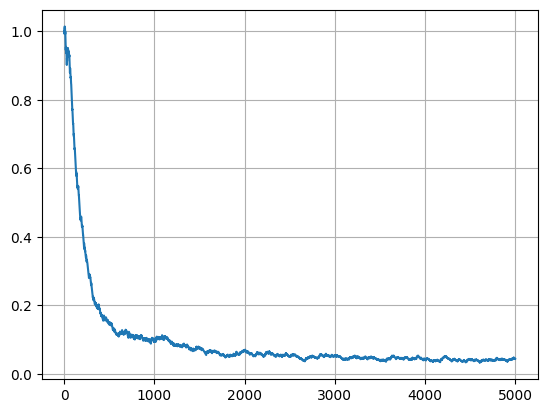

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# сигмоидная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y        # margin
    return 2 / (1 + np.exp(M))

# производная функции потерь по вектору w
def df(w, x, y):
    L1 = 1.0                # коэффицент L1 регуляризатора
    M = np.dot(w, x) * y    # margin
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y + L1 * np.sign(w) # <- встроенный в функцию потерь регуляризатор

# обучающая выборка с тремя признаками (третий - константа +1)
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]   # 0 - ширина, 1 - длина
x_train = [x + [10*x[0], 10*x[1], 5*(x[0]+x[1])] for x in x_train]  # добавляем еще 3 признака по правилу
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])             # для каждого определен класс

# параметры для SGD
fn = len(x_train[0])    # кол-во признаков
n_train = len(x_train)  # размер обучающей выборки
w = np.zeros(fn)        # начальные весовые коэффиценты
nt = 0.00001            # шаг сходимости SGD
lm = 0.01               # скорость "забывания" для Q (экспоненциальное скользящее среднее)
N = 5000                # количество итераций SGD

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])  # начальный показаетль качества Q
Q_plot = [Q]

# SGD
for i in range(N):
    k = np.random.randint(0, n_train - 1)       # случайный индекс
    ek = loss(w, x_train[k], y_train[k])        # вычисление потерь для выбранного вектора
    w = w - nt * df(w, x_train[k], y_train[k])  # корректировка весов по SGD
    Q = lm * ek + (1 - lm) * Q                  # пересчет показателя качества по экспоненциальному скользящему среднему
    Q_plot.append(Q)

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])  # эмпирический риск после оубчения
print(w)
print(Q)

# график изменения показателя качества (среднего эмпирического риска) с изменением весов w
plt.plot(Q_plot)
plt.grid(True)
plt.show()